In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/av-janatahack-machine-learning-in-agriculture/test_pFkWwen.csv
/kaggle/input/av-janatahack-machine-learning-in-agriculture/sample_submission_O1oDc4H.csv
/kaggle/input/av-janatahack-machine-learning-in-agriculture/train_yaOffsB.csv


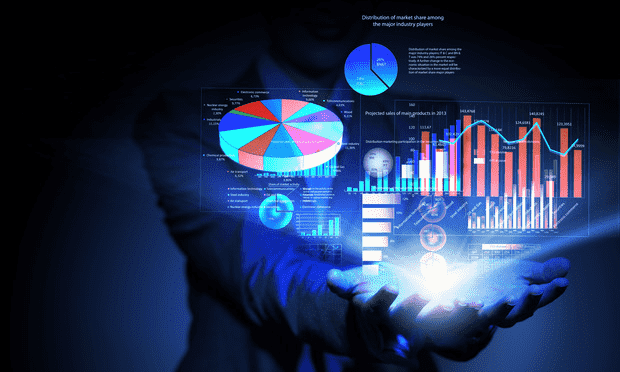

<div class="alert alert-warning">  
<h2><strong>Why exploratory data analysis (EDA) ?</strong></h2>


<p><h4>Exploratory data analysis is an approach to analyze the data. It's where a data enthusiast would be able to get an idea of overall structure of a dataset by bird's eye view. Data science often consist of advanced statistical and machine learning techniques. However, often the power of exploratory data analysis (EDA) is underestimated. In statistics, exploratory data analysis is an approach to analyzing dataset to summarize their main characteristics, often with visual methods. EDA is capable of telling us what kind of statistical techniques or modelling can be applied for the data.

EDA also plays a important role in feature engineering part as well. Having a good idea about the features in the data set, we will be able to create more significant features.
    </h4> </p>
    
</div>


<div class="alert alert-warning">  
<h2><strong>Main purpose of EDA</strong></h2>
  
* ****Check the missing values in data or any irrelevant characters****
* **Detect the Anomalies/Outliers in data**
* **Incorrect Headers of features**
* **Understand each and every data point by various analysis techniques**
* **Analyze the relationship between the variables**
    

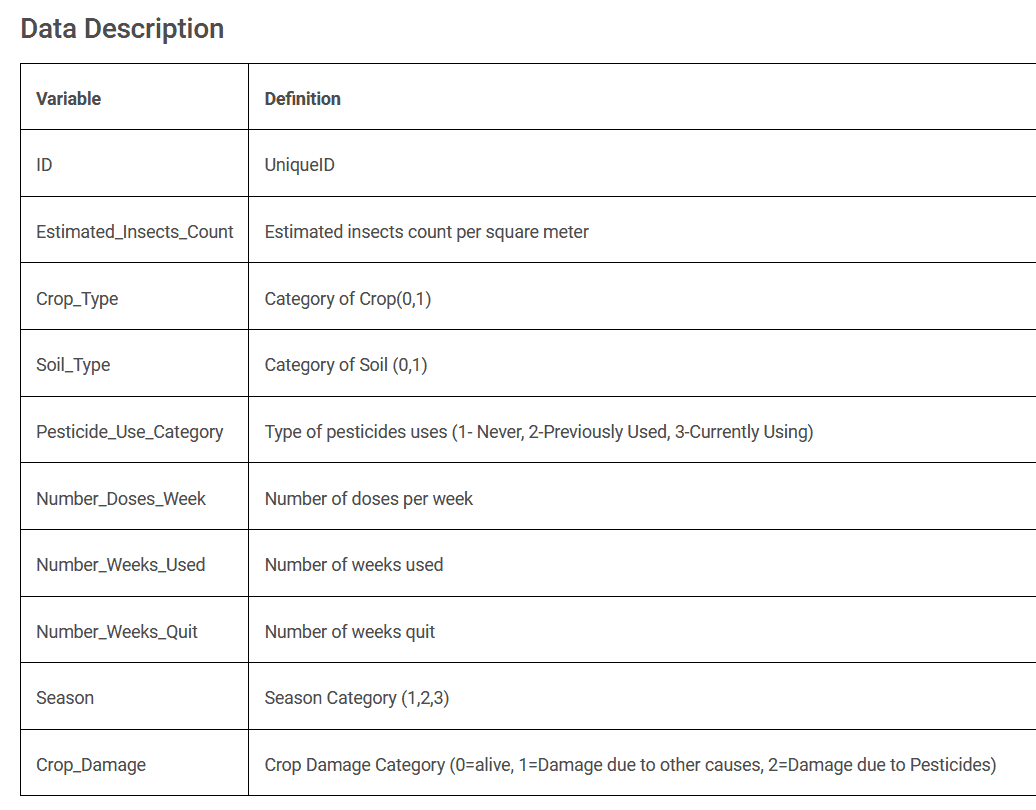

<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Notebook Content!</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#libraries" role="tab" aria-controls="profile">Import Libraries<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#load" role="tab" aria-controls="messages">Load Data<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#visual" role="tab" aria-controls="settings">Missing value treatment<span class="badge badge-primary badge-pill">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#word" role="tab" aria-controls="settings">Summary of data<span class="badge badge-primary badge-pill">4</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#clean" role="tab" aria-controls="settings">Filtering data<span class="badge badge-primary badge-pill">5</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#split" role="tab" aria-controls="settings">Graphical analysis<span 
                                                                                                                                                   class="badge badge-primary badge-pill">6</span></a>

<div class="alert alert-danger">
<h2><strong>Library Imports</strong></h2>
</div>

In [2]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-danger">
<h2><strong>View at the dataset</strong></h2>
</div>

In [3]:
data = pd.read_csv("../input/av-janatahack-machine-learning-in-agriculture/train_yaOffsB.csv")
data.shape 

(88858, 10)

In [4]:
data.head(3).append(data.tail(3))


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0
88857,F00155945,3895,1,0,2,20,37.0,7,3,0


In [5]:
data['ID'].nunique() 


88858

<div class="alert alert-danger">
<h2><strong>Missing values</strong></h2>
</div>

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64


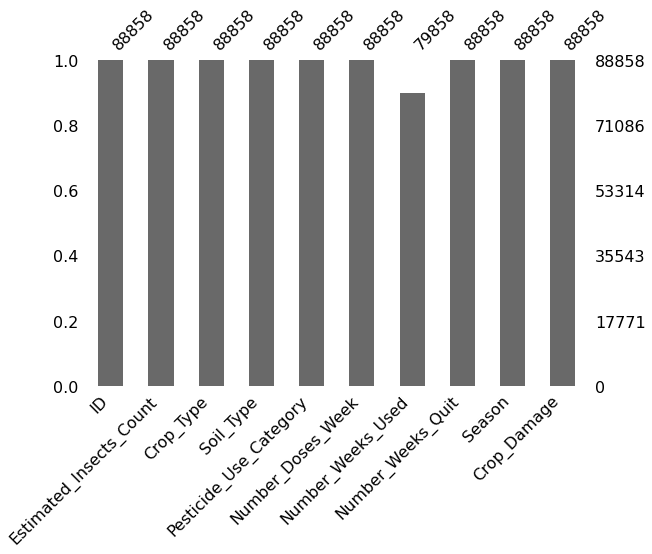

In [6]:
import missingno as msno
print(data.isnull().sum())

p = msno.bar(data, figsize = (9,6))

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [8]:
data['Number_Weeks_Used'].fillna(method = 'ffill', inplace = True)
data['Number_Weeks_Used'] = data['Number_Weeks_Used'].astype('int64')



*Here i have used forward fill to impute the missing values just for simplicity, you could use any of the methods such as mean, median , mode etc..or just drop the missing values.*

<div class="alert alert-danger">
<h2><strong>Summary of data</strong></h2>
</div>

In [9]:
col = data.columns.tolist()
col.remove('ID')
data[col].describe(percentiles = [.25,.5,.75,.95,.97,.99])  

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.600531,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.395172,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
95%,2999.000000,1.000000,1.000000,3.000000,60.000000,50.000000,29.000000,3.000000,1.000000
97%,3337.000000,1.000000,1.000000,3.000000,60.000000,53.000000,32.000000,3.000000,1.000000
99%,3702.000000,1.000000,1.000000,3.000000,70.000000,58.000000,37.000000,3.000000,2.000000


<h3 style="border:2px solid Tomato;"> Pandas describe() function provides the statistical summary about the data such as mean, max, min, standard deviation, count along with this we can also pass the percentiles where we will be able to get the idea about the outliers in the data.</h3>



<div class="alert alert-danger">
<h2><strong>Filtering the data</strong></h2>
</div>

In [10]:
data[(data['Season'] == 1) & (data['Crop_Damage'] == 1) & (data['Soil_Type'] == 0)].head() 


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
11,F00000023,1575,0,0,1,0,0,0,1,1
73,F00000140,488,0,0,3,10,17,0,1,1
74,F00000141,488,0,0,3,20,33,0,1,1
82,F00000156,531,0,0,3,20,34,0,1,1
120,F00000232,789,0,0,3,25,34,0,1,1


In [11]:
pd.DataFrame(data.groupby(['Crop_Damage','Crop_Type'])['Pesticide_Use_Category'].count())


Pesticide_Use_Category
Crop_Damage Crop_Type                        
0           0                           52778
            1                           21460
1           0                            9204
            1                            3103
2           0                            1607
            1                             706

In [12]:
pd.DataFrame(data.groupby(['Crop_Damage','Season','Crop_Type'])['Estimated_Insects_Count'].count())


Estimated_Insects_Count
Crop_Damage Season Crop_Type                         
0           1      0                            15996
                   1                             6497
            2      0                            26265
                   1                            10616
            3      0                            10517
                   1                             4347
1           1      0                             2801
                   1                              947
            2      0                             4572
                   1                             1543
            3      0                             1831
                   1                              613
2           1      0                              472
                   1                              189
            2      0                              827
                   1                              387
            3      0                              308
                   1                              130

In [13]:

df = pd.DataFrame( data[data['Crop_Damage'] == 1 ].mean(), columns = ['Values'])
df[ 'Variance'] = pd.DataFrame( data[data['Crop_Damage'] == 1 ].var())
df[ 'Standard deviation'] = pd.DataFrame( data[data['Crop_Damage'] == 1 ].std())
df[ 'Median'] = pd.DataFrame( data[data['Crop_Damage'] == 1 ].median())
df

,Values,Variance,Standard deviation,Median
Estimated_Insects_Count,1839.106200,853897.151974,924.065556,1678.0
Crop_Type,0.252133,0.188577,0.434255,0.0
Soil_Type,0.435037,0.245800,0.495782,0.0
Pesticide_Use_Category,2.416592,0.333100,0.577148,2.0
Number_Doses_Week,24.176079,212.001905,14.560285,20.0
Number_Weeks_Used,34.571951,196.937188,14.033431,36.0
Number_Weeks_Quit,7.630698,106.755121,10.332237,0.0
Season,1.894044,0.491942,0.701385,2.0
Crop_Damage,1.000000,0.000000,0.000000,1.0


<div class="alert alert-danger">
<h2><strong>Graphical analysis</strong></h2>
</div>

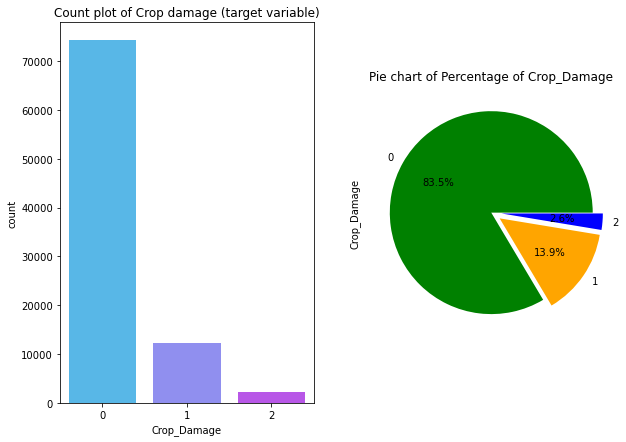

In [14]:
plt.subplot(1,2,1)
sns.countplot(x = 'Crop_Damage' , palette= 'cool', data= data) 
plt.title("Count plot of Crop damage (target variable)")

plt.subplot(1,2,2)
count = data['Crop_Damage'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['green','orange','blue'], figsize = (10,7),explode = [0,0.1,0.1],title = "Pie chart of Percentage of Crop_Damage")



<h3 style="border:2px solid Tomato;">By the count plot and pie chart we can infer that crop alive category has larger data points as compared to the other two categories. Since this is a multi-class classification problem, this is a clear case of multi-class imbalance problem.</h3>

Text(0.5, 1.0, 'Plot of crop damage Vs Crop type')

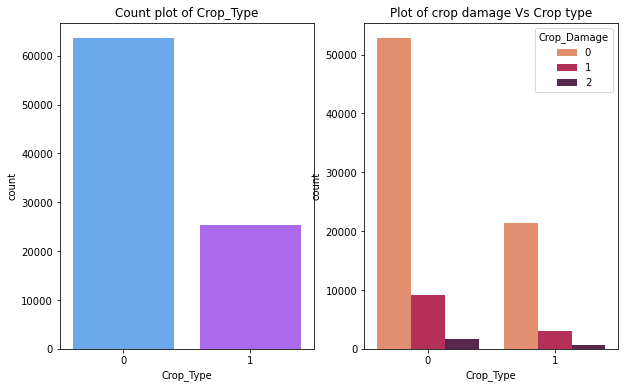

In [15]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.countplot(x = 'Crop_Type' , palette= 'cool', data= data) 
plt.title("Count plot of Crop_Type")

plt.subplot(1,2,2)
sns.countplot(data['Crop_Type'], hue = data['Crop_Damage'],palette="rocket_r")
plt.title("Plot of crop damage Vs Crop type")

**Inference**

* Crop type 0 has larger data points as compared to the crop type 1

* More than 50000 of the crops of crop type 0 and 20000 of crops of crop type 1 are alive

* There is more damage to crop 0 due to pesticides

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7907e631d0>,
      dtype=object)

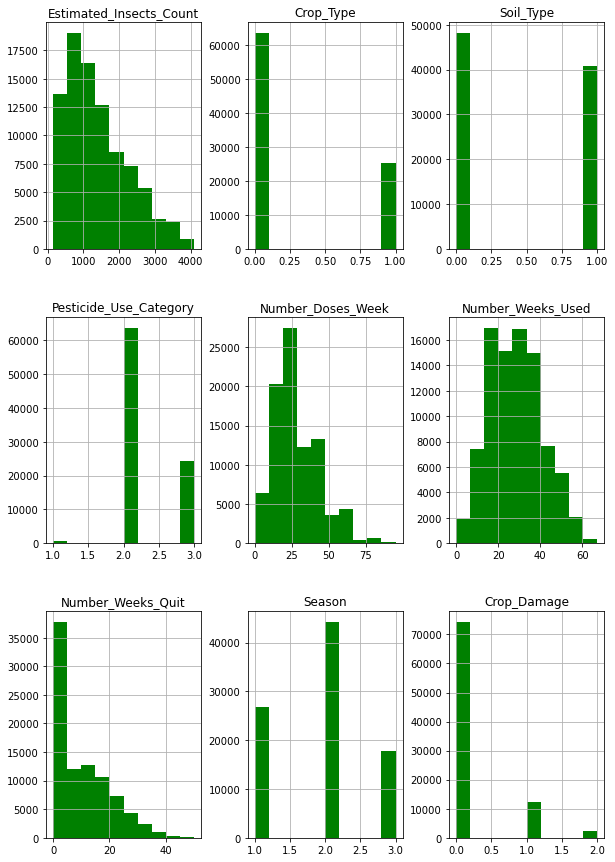

In [16]:
data[col].hist(figsize=(10,15),color = 'green')


Text(0.5, 1.0, 'Density plot of Estimated_Insects_Count')

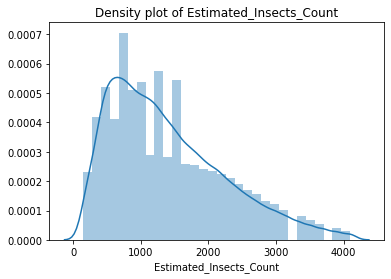

In [17]:
sns.distplot(data['Estimated_Insects_Count'], kde = True, hist = True, bins= 30)
plt.title("Density plot of Estimated_Insects_Count")

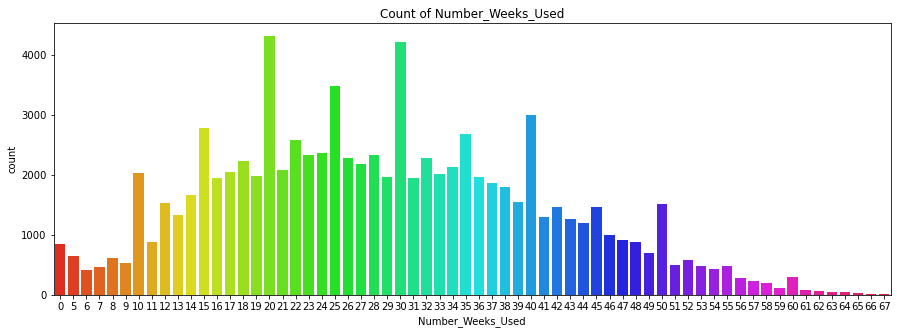

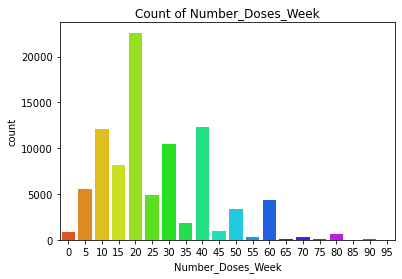

In [18]:

plt.figure(figsize = (15,5))
sns.countplot(data['Number_Weeks_Used'], palette = 'hsv')
plt.title('Count of Number_Weeks_Used')
plt.show() 
sns.countplot(data['Number_Doses_Week'], palette = 'hsv')
plt.title('Count of Number_Doses_Week')
plt.show() 

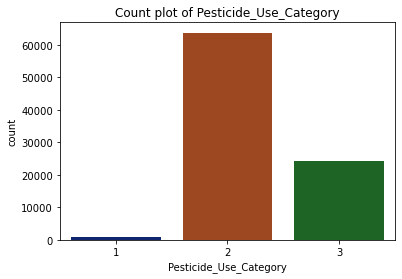

Text(0.5, 1.0, 'Box plot of Pesticide_Use_Category')

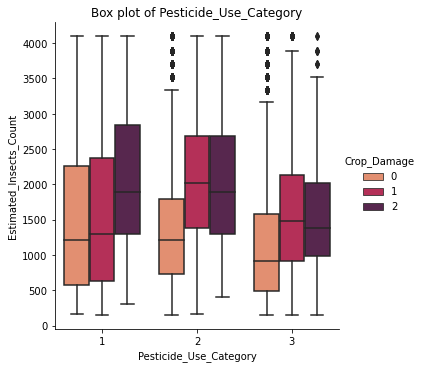

In [19]:

sns.countplot(data['Pesticide_Use_Category'], palette = 'dark')
plt.title("Count plot of Pesticide_Use_Category")
plt.show()
sns.catplot(x = 'Pesticide_Use_Category', y = 'Estimated_Insects_Count', kind = 'box', data = data, hue = 'Crop_Damage', palette= 'rocket_r')
plt.title("Box plot of Pesticide_Use_Category")


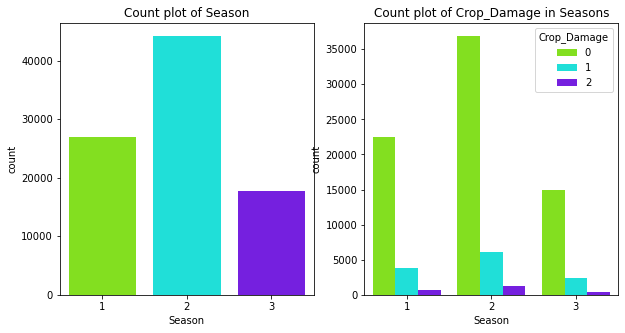

In [20]:

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(data['Season'], palette = 'hsv')
plt.title('Count plot of Season')
plt.subplot(1,2,2)
sns.countplot(data['Season'], hue = data['Crop_Damage'], palette = 'hsv')
plt.title('Count plot of Crop_Damage in Seasons')
plt.show() 

In [21]:
import plotly.express as px

fig = px.sunburst(data, path=[ 'Season','Crop_Type'], title="Crop type in various seasons")

fig.show()

Text(0.5, 1.0, 'Count plot of Crop_type in Seasons')

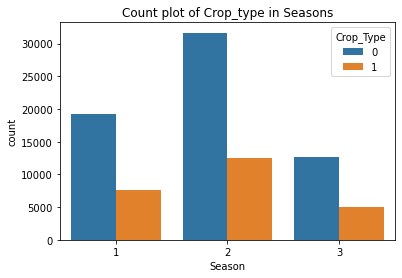

In [22]:

sns.countplot(data['Season'], hue = data['Crop_Type'])
plt.title('Count plot of Crop_type in Seasons')


<h3 style="background-color:LightGreen; color:red" >These are some of the basic analysis that are performed on the data at the first phase, added to this we can also perform correlation analysis as well. In our case we have most of the variables are multilevel categorical variables.We cannot perform Pearson's correlation, this can be carried out by the statistical test such as ANOVA.</h3>

<h2 style="background-color:LightRed; color:blue">Hope you find this article helpful. Please upvote ! </h2>